In [1]:
#pip install tensorflow

In [29]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
#importing dataset
df=pd.read_csv("IMDB Dataset.csv") 
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
#Checking Dataset Description 
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [5]:
#sentiment count
print("Total :\n",df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [6]:
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

In [7]:
labels = df ['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [8]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20) 

from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels
train_test_split (review, labels, test_size=0.20)

[["Nightmare Weekend is proof positive that some people are so desperate to be 'in the movies' they are prepared to do almost anything.<br /><br />I'm not referring to the countless women who seem quite happy to appear completely starkers in this dreadful piece of trash (after all, the naked female form is a beautiful thing and nothing to be ashamed of). No...I'm talking about those who are more than willing to co-star with a badly made hand-puppet called George. Now that is embarrassing!!!<br /><br />A bio-electronic being created by brilliant scientist Edward Brake (Wellington Meffert), George (who looks like a demented felt clown with green wool for hair) is the artificially intelligent interface for an advanced computer system that operates a revolutionary device (a silver sphere about the size of a golf ball) that, when ingested, can reverse character disorders.<br /><br />Edward's personality altering experiments have been successful on lab animals, but the cautious scientist is 

In [9]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<00V>"

In [10]:
# Initialize the Tokenizer class
tokenizer = Tokenizer (num_words = vocab_size, oov_token=oov_tok)

In [11]:
# Generate the word index dictionary for the training 
sentences = tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

In [12]:
# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences (train_sentences)
padded = pad_sequences (sequences, maxlen=max_length, truncating=trunc_type)

In [13]:
# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences (test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

In [14]:
# Build the model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
num_epochs = 10
history = model.fit(padded,
                    train_labels, epochs=num_epochs,
                    validation_data=(test_padded, test_labels))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.6821 - loss: 0.5596 - val_accuracy: 0.7997 - val_loss: 0.4319
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8316 - loss: 0.3741 - val_accuracy: 0.8030 - val_loss: 0.4257
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8688 - loss: 0.3067 - val_accuracy: 0.7957 - val_loss: 0.4601
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9054 - loss: 0.2367 - val_accuracy: 0.7840 - val_loss: 0.5395
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9339 - loss: 0.1751 - val_accuracy: 0.7623 - val_loss: 0.7096
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9604 - loss: 0.1177 - val_accuracy: 0.7643 - val_loss: 0.8375
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9782 - loss: 0.0724 - val_accuracy: 0.7648 - val_loss: 1.0127
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9897 - loss: 0.0427 -

<Axes: >

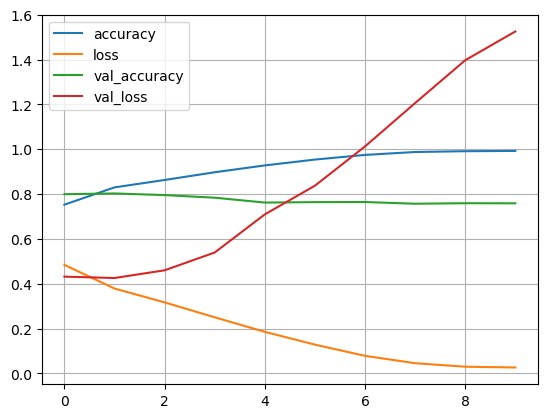

In [18]:
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

In [19]:
# Predicciones
test_predictions = (model.predict(test_padded) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [22]:
# Métricas
f1 = f1_score(test_labels, test_predictions)
print("F1 Score:", f1)

F1 Score: 0.7563687828548322


In [23]:
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[3849 1147]
 [1263 3741]]


In [24]:
# Curva ROC
fpr, tpr, _ = roc_curve(test_labels, model.predict(test_padded))
roc_auc = auc(fpr, tpr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


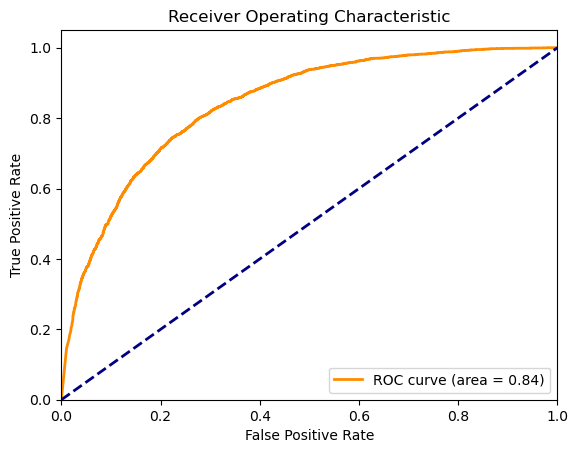

In [27]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

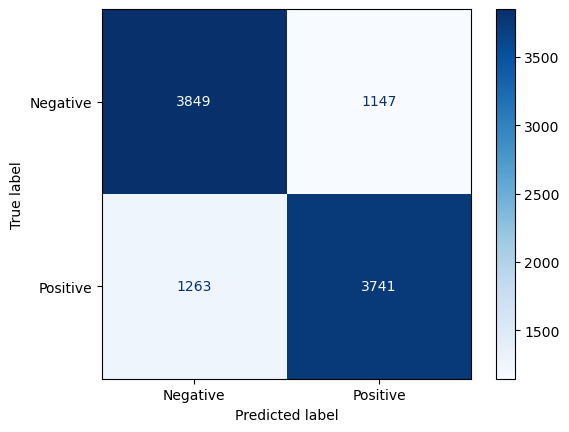

In [30]:
# Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

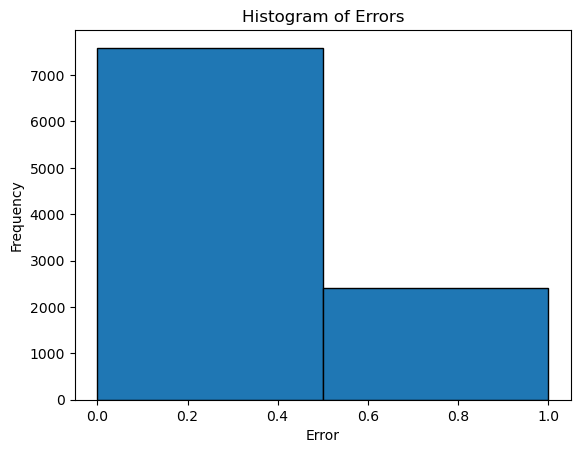

In [31]:
# Histograma de Errores
errors = np.abs(test_labels - test_predictions.flatten())
plt.hist(errors, bins=2, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

In [99]:
# Mejorando el modelo
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),  # LSTM con return_sequences=True
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(32),  # LSTM sin return_sequences (output de una secuencia)
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Salida para clasificación binaria
])


C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [100]:
# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [101]:
# Print the model summary
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
# Train the model
num_epochs = 8
history = model.fit(padded,
                    train_labels, epochs=num_epochs,
                    validation_data=(test_padded, test_labels))

Epoch 1/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 65ms/step - accuracy: 0.6499 - loss: 0.6028 - val_accuracy: 0.7796 - val_loss: 0.4722
Epoch 2/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.7893 - loss: 0.4634 - val_accuracy: 0.7935 - val_loss: 0.4405
Epoch 3/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 71ms/step - accuracy: 0.8037 - loss: 0.4292 - val_accuracy: 0.8107 - val_loss: 0.4159
Epoch 4/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - accuracy: 0.8061 - loss: 0.4152 - val_accuracy: 0.8016 - val_loss: 0.4276
Epoch 5/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 69ms/step - accuracy: 0.8154 - loss: 0.4013 - val_accuracy: 0.8194 - val_loss: 0.4016
Epoch 6/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 71ms/step - accuracy: 0.8257 - loss: 0.3849 - val_accuracy: 0.8197 - val_loss: 0.4026
Epoch 7/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - accuracy: 0.8316 - loss: 0.3719 - val_accuracy: 0.8196 - val_loss: 0.3882
Epoch 8/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 77ms/step - accuracy: 0.8395 - loss: 0

<Axes: >

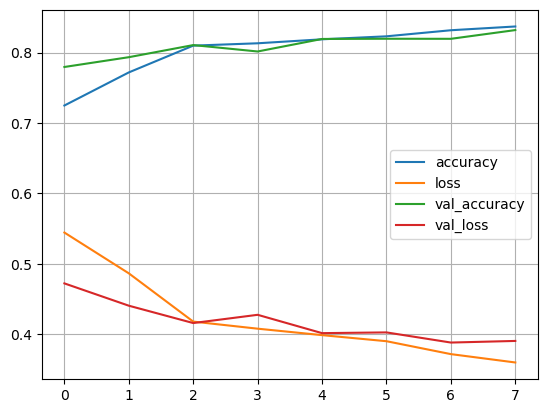

In [111]:
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

In [104]:
# Predicciones
test_predictions = (model.predict(test_padded) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [105]:
# Métricas
f1 = f1_score(test_labels, test_predictions)
print("F1 Score:", f1)

F1 Score: 0.8388025331030512


In [106]:
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[3949 1047]
 [ 633 4371]]


In [107]:
# Curva ROC
fpr, tpr, _ = roc_curve(test_labels, model.predict(test_padded))
roc_auc = auc(fpr, tpr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


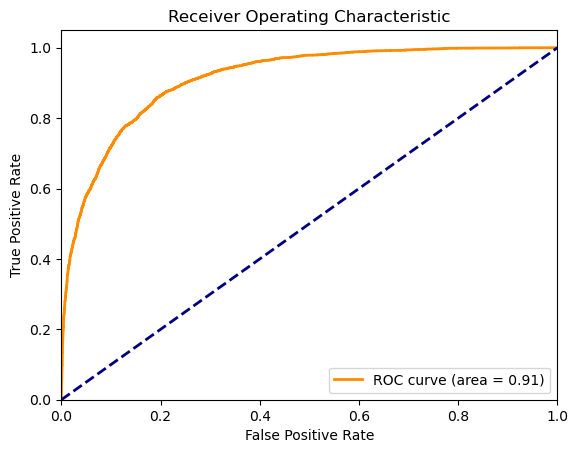

In [108]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

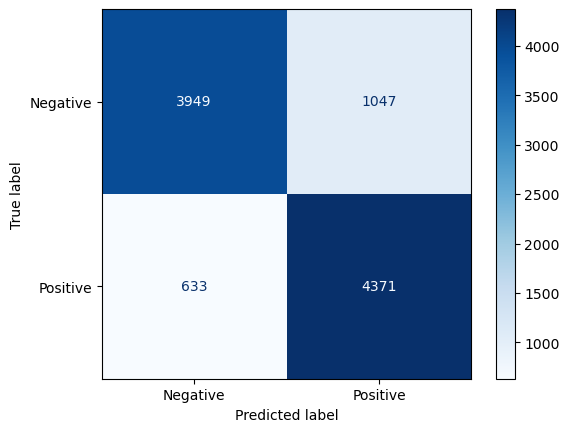

In [109]:
# Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

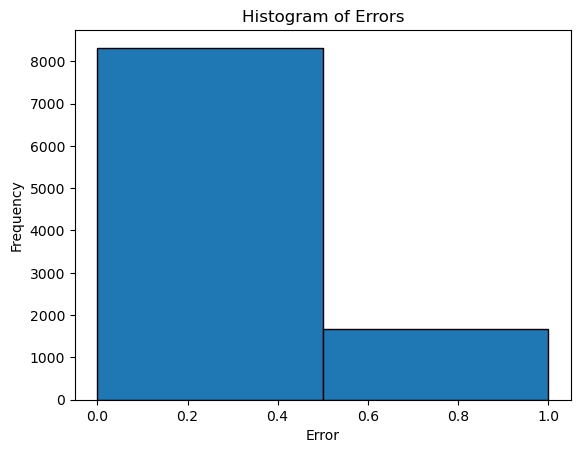

In [110]:
# Histograma de Errores
errors = np.abs(test_labels - test_predictions.flatten())
plt.hist(errors, bins=2, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

In [112]:
# Construcción del modelo mejorado
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(128, return_sequences=True),  # Primera capa LSTM
    keras.layers.Dropout(0.25),  # Dropout para prevenir el sobreajuste
    keras.layers.LSTM(64, return_sequences=True),  # Segunda capa LSTM
    keras.layers.Dropout(0.25),  # Dropout para prevenir el sobreajuste
    keras.layers.LSTM(32),  # Cuarta capa LSTM (última sin return_sequences=True)
    keras.layers.Dropout(0.25),  # Dropout para prevenir el sobreajuste
    keras.layers.Dense(32, activation='relu'),  # Capa densa adicional
    keras.layers.Dropout(0.25),  # Dropout para prevenir el sobreajuste
    keras.layers.Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [88]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(16),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [113]:
# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [114]:
# Print the model summary
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
# Train the model
num_epochs = 10
history = model.fit(padded,
                    train_labels, epochs=num_epochs,
                    validation_data=(test_padded, test_labels))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 186s 143ms/step - accuracy: 0.5569 - loss: 0.6848 - val_accuracy: 0.5663 - val_loss: 0.6855
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 189s 151ms/step - accuracy: 0.5656 - loss: 0.6860 - val_accuracy: 0.5468 - val_loss: 0.6888
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 149ms/step - accuracy: 0.5467 - loss: 0.6891 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 156ms/step - accuracy: 0.5030 - loss: 0.6934 - val_accuracy: 0.4996 - val_loss: 0.6931
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 189s 151ms/step - accuracy: 0.5021 - loss: 0.6933 - val_accuracy: 0.4996 - val_loss: 0.6931
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 196s 157ms/step - accuracy: 0.5027 - loss: 0.6931 - val_accuracy: 0.5004 - val_loss: 0.6931
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 150ms/step - accuracy: 0.4988 - loss: 0.6935 - val_accuracy: 0.4996 - val_loss: 0.6930
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 160ms/step - ac

<Axes: >

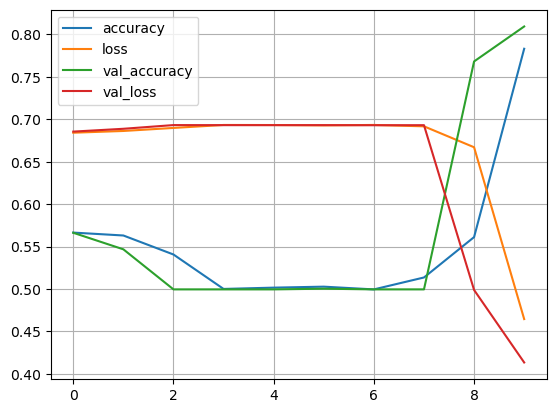

In [116]:
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

In [117]:
# Predicciones
test_predictions = (model.predict(test_padded) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step


In [118]:
# Métricas
f1 = f1_score(test_labels, test_predictions)
print("F1 Score:", f1)

F1 Score: 0.8069286871961102


In [119]:
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[4111  885]
 [1021 3983]]


In [120]:
# Curva ROC
fpr, tpr, _ = roc_curve(test_labels, model.predict(test_padded))
roc_auc = auc(fpr, tpr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step


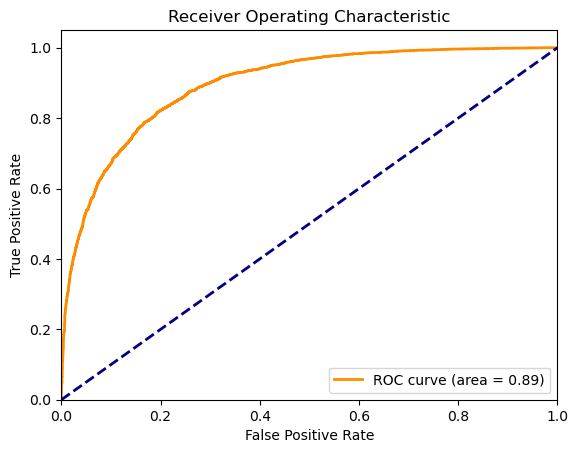

In [121]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

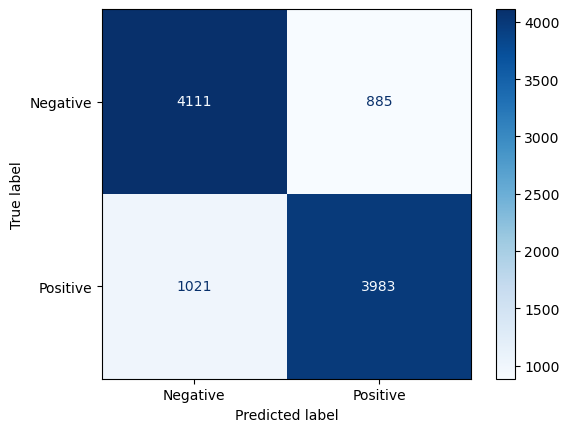

In [122]:
# Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

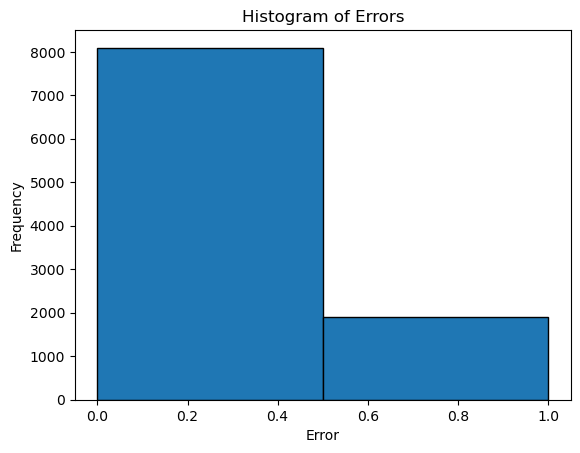

In [123]:
# Histograma de Errores
errors = np.abs(test_labels - test_predictions.flatten())
plt.hist(errors, bins=2, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

### 1. ¿Qué hace el código en general?
El código entrena un modelo de red neuronal para clasificar reseñas de películas de un conjunto de datos del IMDB en dos categorías: "positiva" y "negativa". Utiliza procesamiento de texto para convertir las reseñas en secuencias numéricas, entrena un modelo de red neuronal usando esas secuencias, y evalúa el rendimiento del modelo utilizando métricas como la matriz de confusión, el F1 Score, y la curva ROC.

### 2. ¿Cuál es el propósito de cada parte del código?
Carga y preparación de datos: Lee el conjunto de datos desde un archivo CSV, imprime información general y convierte las reseñas de texto en un formato que el modelo puede procesar.
Tokenización y padding: Convierte las reseñas de texto en secuencias de números y las ajusta para que tengan la misma longitud.
Construcción del modelo: Define la arquitectura de la red neuronal.
Entrenamiento del modelo: Ajusta los pesos del modelo con los datos de entrenamiento y valida el modelo con los datos de prueba.
Evaluación: Calcula y visualiza métricas de rendimiento como el F1 Score, la matriz de confusión y la curva ROC.

### 3. ¿Por qué se utilizan los parámetros específicos en cada función (por ejemplo, num_words, embedding_dim, input_length, loss, optimizer, etc.)?
num_words: Especifica el tamaño del vocabulario que se usará. Un valor más alto incluye más palabras en el diccionario, pero puede aumentar el tiempo de entrenamiento y la complejidad del modelo.
embedding_dim: Dimensión del espacio en el que se representan las palabras. Un valor más alto puede capturar más información semántica, pero también puede requerir más datos y tiempo para entrenar.
input_length: Longitud máxima de las secuencias de entrada. Asegura que todas las entradas tengan el mismo tamaño, lo que es necesario para el procesamiento en lotes.
loss: Función que mide el error del modelo durante el entrenamiento. binary_crossentropy es adecuada para problemas de clasificación binaria.
optimizer: Algoritmo que ajusta los pesos del modelo durante el entrenamiento. adam es popular por su eficacia y capacidad para manejar grandes volúmenes de datos y parámetros.

### 4. ¿Cuál es la diferencia entre train_sentences y test_sentences?
train_sentences: Son las reseñas de entrenamiento usadas para ajustar el modelo.
test_sentences: Son las reseñas de prueba que se usan para evaluar la capacidad del modelo para generalizar a datos que no ha visto antes.

### 5. ¿Qué significan vocab_size, max_length, embedding_dim y oov_tok?
vocab_size: Número máximo de palabras únicas que el modelo considerará. Limita el tamaño del diccionario.
max_length: Longitud máxima de las secuencias de entrada. Las secuencias más largas se truncan y las más cortas se rellenan.
embedding_dim: Número de dimensiones en el espacio de embedding en el que las palabras son representadas.
oov_tok: Token que representa palabras fuera del vocabulario. Se usa para manejar palabras que no están en el vocabulario definido.

### 6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?
Embedding: Convierte palabras en vectores densos y continuos, capturando relaciones semánticas entre ellas.
Flatten: Aplana la salida del embedding para que pueda ser pasada a capas densas.
Dense: Capa completamente conectada que realiza la clasificación. La primera capa densa (64 unidades) aprende características complejas, y la segunda capa densa (1 unidad) da la salida final.
sigmoid: Función de activación en la capa de salida que produce una probabilidad entre 0 y 1 para la clasificación binaria.

### 7. ¿Qué representan las métricas de pérdida y precisión en el modelo?
Pérdida: Mide cuán mal está el modelo al hacer predicciones. Durante el entrenamiento, se intenta minimizar esta pérdida.
Precisión: Proporción de predicciones correctas entre todas las predicciones hechas. En este caso, mide la exactitud del modelo para clasificar correctamente las reseñas.

### 8. ¿Qué pasa durante el entrenamiento del modelo?
Durante el entrenamiento, el modelo ajusta sus pesos para minimizar la pérdida calculada en función de las predicciones y las etiquetas reales. El optimizador usa esta pérdida para actualizar los pesos en cada época, mejorando el rendimiento del modelo en los datos de entrenamiento y validación.

### 9. ¿Qué significan las épocas y cómo afectan al proceso de entrenamiento?
Épocas: Son el número de veces que el modelo pasa por todo el conjunto de datos de entrenamiento. Más épocas pueden permitir que el modelo aprenda mejor, pero también aumentan el riesgo de sobreajuste si el modelo se entrena demasiado.

### 10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?
La validación con datos de prueba asegura que el modelo no solo se ajusta a los datos de entrenamiento (lo que podría llevar a sobreajuste), sino que también generaliza bien a datos nuevos e invisibles. Evalúa cómo se desempeñará el modelo en escenarios del mundo real.

### 11. ¿Cuál es el objetivo final del código?
El objetivo final del código es construir, entrenar y evaluar un modelo de red neuronal para la clasificación de sentimientos en reseñas de películas. Se busca que el modelo clasifique correctamente las reseñas en positivas o negativas y se evalúe su rendimiento usando varias métricas y visualizaciones.